<a href="https://colab.research.google.com/github/Dinaabdalla2018/Arabic-Dialect-Identification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machine (**SVM**) 
###SVM a supervised machine learning algorithm used widely for language identification task 
###Dataset contain 2 colum: id , dialect
The **id** column will be used to retrieve the text, to do that, you need to call this API by a POST request.

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 2.8.0.


###Set Path

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


####Libraries__________

In [ ]:
from data_ import *        #call the file python data_ (contain All function related with preprocessing dataset)
import matplotlib.cm as cm
from sklearn.svm import SVC
import pickle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###Call data

In [ ]:
data = data_("dialect_dataset.csv",170280)                                # Call the dataset with 140280 rows randoms from total data
data.Call_API("https://recruitment.aimtechnologies.co/ai-tasks",170,280)  #  text from Api with 140 thousand and 280
data.Transform_data()                                                     # transform data into number of vector

In [ ]:
data.Split_Data()  # Split data into train&test

In [ ]:
data.save_trans_models('featurem.pkl', 'tfidftransformerm.pkl')

##Train SVM Model with Train dataset

In [ ]:
classifier = SVC(gamma='scale')
classifier = classifier.fit(data.xtrain,data.ytrain)

##Evaluation Model

In [ ]:
pred = classifier.predict(data.xtest)
print(classification_report(data.ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

          AE       0.37      0.01      0.03      1578
          BH       0.33      0.06      0.09      1561
          DZ       0.68      0.05      0.09      1022
          EG       0.19      0.72      0.30      3367
          IQ       0.62      0.01      0.02       863
          JO       0.31      0.02      0.04      1755
          KW       0.17      0.41      0.24      2600
          LB       0.28      0.12      0.17      1726
          LY       0.17      0.11      0.14      2285
          MA       0.89      0.05      0.10       671
          OM       0.62      0.01      0.01      1238
          PL       0.19      0.35      0.24      2777
          QA       0.25      0.08      0.13      1926
          SA       0.32      0.02      0.04      1635
          SD       1.00      0.00      0.00       892
          SY       1.00      0.00      0.01       993
          TN       0.81      0.03      0.06       573
          YE       1.00    

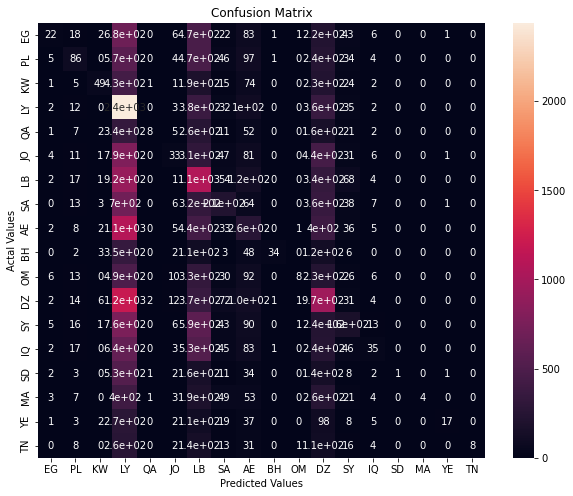

In [ ]:
class_label = ['EG','PL','KW','LY','QA','JO','LB','SA','AE','BH','OM','DZ','SY','IQ','SD','MA','YE','TN']
conf_mat    = confusion_matrix(ytest, pred)
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
plt.figure(figsize=(10,8))
sns.heatmap(df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Text(0, 0.5, 'Frequency')

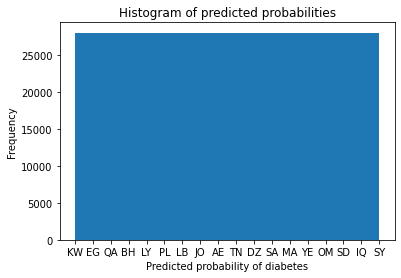

In [ ]:
import matplotlib.pyplot as plt
plt.hist(pred, bins=1)

# x-axis limit from 0 to 1
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

##Save model as **File.sav** 

In [ ]:
def save_model(name_file,name_model):
        # Save Model to a file
        pickle.dump(name_model, open(name_file, 'wb'))

In [ ]:
save_model('svm.sav',classifier)

In [ ]:
model = pickle.load(open('svm.sav', 'rb'))

In [ ]:
import pickle
with open('svm.sav', 'rb') as f:
    model = pickle.load(f)

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
loaded_vec = CountVectorizer(decode_error=" Replace ", vocabulary=pickle.load(open('/content/drive/MyDrive/featurem.pkl', "rb" )))

In [ ]:
modelx = pickle.load(open('/content/drive/MyDrive/tfidftransformerm.pkl', 'rb'))
test_tfidf = modelx.transform(loaded_vec.transform(['@HamadiElareibi لالا لقيته مسكر عديت لعبت سوني وتو هالوقت كيف روحت 😂😂'])).toarray()

In [ ]:
model.predict(test_tfidf)

ValueError: ignored